# Семинар 1: знакомство с PyTorch 🔥

## Вступление

В этом семинаре мы познакомимся с библиотекой **PyTorch**. Он очень похож на **NumPy**, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) — **PyTorch** может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях.

**План семинара**

1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**
2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций
3. Работаем с градиентами руками
4. Моя первая нейросеть

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn.functional as F
import torchvision
import wandb
from IPython.display import clear_output
from torch import nn
from tqdm.notebook import tqdm

%matplotlib inline

### 1. Вспоминаем **NumPy** и сравниваем операции его функциональность с **PyTorch**

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [6]:
# случайная матрица
a = np.random.rand(5, 3)
a

array([[0.31392408, 0.75254573, 0.00197962],
       [0.2552113 , 0.00623829, 0.2325106 ],
       [0.1484013 , 0.93194579, 0.29137752],
       [0.16306   , 0.36400731, 0.98452432],
       [0.92282513, 0.85400663, 0.77800853]])

In [7]:
# размеры массива
a.shape

(5, 3)

In [8]:
# сложение
a + 5

array([[5.31392408, 5.75254573, 5.00197962],
       [5.2552113 , 5.00623829, 5.2325106 ],
       [5.1484013 , 5.93194579, 5.29137752],
       [5.16306   , 5.36400731, 5.98452432],
       [5.92282513, 5.85400663, 5.77800853]])

In [9]:
# матричное умножение
a @ a.T

array([[0.66487732, 0.08527185, 0.74849539, 0.3270696 , 0.93391624],
       [0.08527185, 0.11923291, 0.1114358 , 0.27279788, 0.42173818],
       [0.74849539, 0.1114358 , 0.97544677, 0.65030166, 1.15953054],
       [0.3270696 , 0.27279788, 0.65030166, 1.12837803, 1.22730885],
       [0.93391624, 0.42173818, 1.15953054, 1.22730885, 2.18623083]])

In [10]:
# среднее по колонкам
a.mean(axis=-1)

array([0.35614981, 0.1646534 , 0.45724154, 0.50386388, 0.85161343])

In [11]:
# решейп
a.reshape(3, 5).shape

(3, 5)

**Разминка**

При помощи **NumPy** посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [13]:
(np.arange(1, 10001) ** 2).sum()

np.int64(333383335000)

Аналогичные операции в **PyTorch** очень похожи, но иногда имеют немного другой синтаксис

In [14]:
# случайный тензор
x = torch.rand(5, 3)
x

tensor([[0.3065, 0.5500, 0.0677],
        [0.0266, 0.7629, 0.8904],
        [0.0439, 0.7489, 0.7011],
        [0.5425, 0.3848, 0.9663],
        [0.2070, 0.3977, 0.1293]])

In [15]:
# размеры тензора
x.shape

torch.Size([5, 3])

In [16]:
# тоже размеры тензора
x.size()

torch.Size([5, 3])

In [17]:
# сложение
x + 5

tensor([[5.3065, 5.5500, 5.0677],
        [5.0266, 5.7629, 5.8904],
        [5.0439, 5.7489, 5.7011],
        [5.5425, 5.3848, 5.9663],
        [5.2070, 5.3977, 5.1293]])

In [18]:
# матричное умножение
# читайте документации по различным вариантам: @, torch.mm, torch.matmul, torch.bmm
torch.matmul(x, x.transpose(1, 0))

tensor([[0.4010, 0.4880, 0.4728, 0.4433, 0.2909],
        [0.4880, 1.3755, 1.1967, 1.1684, 0.4240],
        [0.4728, 1.1967, 1.0542, 0.9894, 0.3975],
        [0.4433, 1.1684, 0.9894, 1.3761, 0.3903],
        [0.2909, 0.4240, 0.3975, 0.3903, 0.2177]])

In [21]:
x @ x.T

tensor([[0.4010, 0.4880, 0.4728, 0.4433, 0.2909],
        [0.4880, 1.3755, 1.1967, 1.1684, 0.4240],
        [0.4728, 1.1967, 1.0542, 0.9894, 0.3975],
        [0.4433, 1.1684, 0.9894, 1.3761, 0.3903],
        [0.2909, 0.4240, 0.3975, 0.3903, 0.2177]])

In [20]:
# очередное матричное умножение
x.mm(x.t())

tensor([[0.4010, 0.4880, 0.4728, 0.4433, 0.2909],
        [0.4880, 1.3755, 1.1967, 1.1684, 0.4240],
        [0.4728, 1.1967, 1.0542, 0.9894, 0.3975],
        [0.4433, 1.1684, 0.9894, 1.3761, 0.3903],
        [0.2909, 0.4240, 0.3975, 0.3903, 0.2177]])

In [22]:
# поэлементное умножение
x * x

tensor([[9.3947e-02, 3.0245e-01, 4.5877e-03],
        [7.0848e-04, 5.8206e-01, 7.9278e-01],
        [1.9234e-03, 5.6080e-01, 4.9148e-01],
        [2.9432e-01, 1.4805e-01, 9.3375e-01],
        [4.2849e-02, 1.5813e-01, 1.6725e-02]])

In [26]:
# среднее по колонкам
x.mean(axis=-1)

tensor([0.3081, 0.5600, 0.4979, 0.6312, 0.2447])

In [27]:
# решейп
x.view([3, 5]).shape

torch.Size([3, 5])

In [28]:
# или так
x.reshape([3, 5]).shape

torch.Size([3, 5])

In [29]:
# будьте внимательны и не используйте view для транспонирования осей!
x.view_as(x.t()) == x.t()

tensor([[ True, False, False, False, False],
        [False, False,  True, False, False],
        [False, False, False, False,  True]])

Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype("int64") -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог **NumPy** операции в **PyTorch**


Разминка на PyTorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [30]:
(torch.arange(1, 10001) ** 2).sum()

tensor(333383335000)

### 2. Создаем тензоры в **PyTorch** и изучаем больше базовых операций

In [31]:
# пустой тензор
x = torch.empty(5, 3)
x

tensor([[-4.9936e-31,  4.4205e-41,  4.7198e-32],
        [ 0.0000e+00,  5.3423e-32,  0.0000e+00],
        [ 1.0420e-32,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  5.1505e-32,  0.0000e+00],
        [ 5.7123e-34,  0.0000e+00,  3.3197e+28]])

In [32]:
# случайный тензор ~ Uniform[0, 1)
x = torch.rand(5, 3)
x

tensor([[0.8006, 0.7998, 0.5137],
        [0.9484, 0.8579, 0.7813],
        [0.2805, 0.5411, 0.6563],
        [0.4454, 0.1742, 0.1920],
        [0.5309, 0.3746, 0.1018]])

In [33]:
# тензор с нулями и указанием типов чисел
x = torch.zeros(5, 3, dtype=torch.float32)
x

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [34]:
# конструируем тензор из питоновского листа
x = torch.tensor([5.5, 3])
x

tensor([5.5000, 3.0000])

In [35]:
# используем уже созданный тензор для создания тензора из единичек
x1 = x.new_ones(5, 3, dtype=torch.double)
x1

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [36]:
# создаем случайный тензор с размерами другого тензора
x = torch.randn_like(x1, dtype=torch.float)
x

tensor([[-0.4988, -1.6418,  1.6536],
        [-0.8731, -0.1434, -0.0605],
        [ 1.4031,  2.2681, -0.5067],
        [ 0.2667, -0.3613,  0.1923],
        [-0.1403,  0.7324, -0.0175]])

In [37]:
x = torch.rand(5, 3)
y = torch.rand(5, 3)

In [38]:
x

tensor([[0.7356, 0.6768, 0.3123],
        [0.7856, 0.5725, 0.2947],
        [0.5156, 0.1134, 0.5375],
        [0.8655, 0.5154, 0.3720],
        [0.8771, 0.4265, 0.7568]])

In [39]:
y

tensor([[0.6480, 0.4688, 0.0130],
        [0.5606, 0.7516, 0.3693],
        [0.1417, 0.2221, 0.5796],
        [0.3930, 0.9266, 0.6002],
        [0.8977, 0.7307, 0.6392]])

In [40]:
# сложение
x + y

tensor([[1.3836, 1.1456, 0.3254],
        [1.3462, 1.3241, 0.6640],
        [0.6572, 0.3355, 1.1172],
        [1.2585, 1.4420, 0.9722],
        [1.7748, 1.1573, 1.3961]])

In [41]:
# очередное сложение
z = torch.add(x, y)
z

tensor([[1.3836, 1.1456, 0.3254],
        [1.3462, 1.3241, 0.6640],
        [0.6572, 0.3355, 1.1172],
        [1.2585, 1.4420, 0.9722],
        [1.7748, 1.1573, 1.3961]])

In [42]:
# наконец, ещё одно сложение!
torch.add(x, y, out=x)
x

tensor([[1.3836, 1.1456, 0.3254],
        [1.3462, 1.3241, 0.6640],
        [0.6572, 0.3355, 1.1172],
        [1.2585, 1.4420, 0.9722],
        [1.7748, 1.1573, 1.3961]])

In [46]:
torch.from_numpy(np.array([1, 2]))

tensor([1, 2])

In [51]:
# добавили измерение в начало, аналог броадкастинга
x.unsqueeze(0).size()

torch.Size([1, 5, 3])

In [52]:
# убрали одно единичное измерение
x.unsqueeze(0).unsqueeze(1).squeeze(0).size()

torch.Size([1, 5, 3])

In [60]:
x.unsqueeze(1).size()

torch.Size([5, 1, 3])

In [64]:
x.unsqueeze(1).squeeze(2).size()

torch.Size([5, 1, 3])

In [54]:
# убрали все единичные измерения
x.unsqueeze(0).unsqueeze(1).size()  # .squeeze().size()

torch.Size([1, 1, 5, 3])

In [57]:
x.unsqueeze(0).unsqueeze(1)[0][0].size()

torch.Size([5, 3])

In [55]:
x.unsqueeze(0).unsqueeze(1).squeeze().size()

torch.Size([5, 3])

In [58]:
# операции без _ не меняют тензор, а создают копию
x.unsqueeze(0)
x.size()

torch.Size([5, 3])

In [65]:
# операции с _ меняют тензор
x.unsqueeze_(0)
x.size()

torch.Size([1, 5, 3])

Мы можем делать обычные срезы и переводить матрицы из **PyTorch** в **NumPy** и наоборот:

In [66]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
np.allclose(x.numpy(), a)

True

In [67]:
np.allclose(x.numpy()[:, 1], a[:, 1])

True

In [68]:
torch.from_numpy(x.numpy())

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])

### 3. Работаем с градиентами руками

In [69]:
# скачиваем The Boston Housing Dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

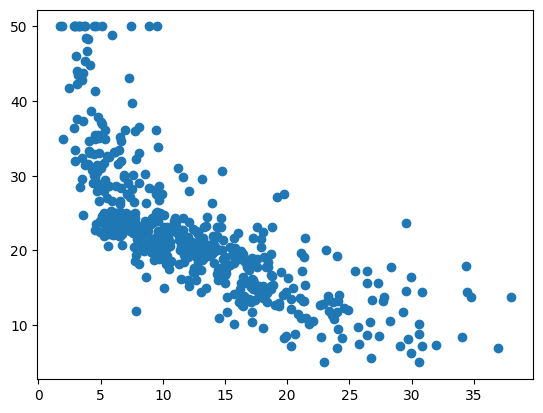

In [70]:
plt.scatter(data[:, -1], target);

В **PyTorch** есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

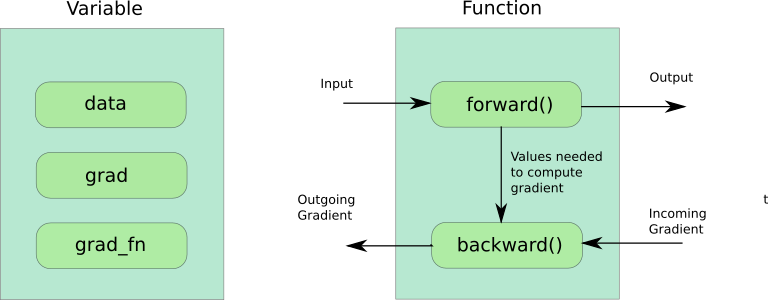

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенты для всех тензоров, у которых `requires_grad=True`.

In [71]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(data[:, -1] / data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(target, dtype=torch.float32)

# только создали тензоры и в них нет градиентов
assert w.grad is None
assert b.grad is None

In [72]:
x.size(), y.size()

(torch.Size([506]), torch.Size([506]))

In [77]:
y_pred = w * x + b
loss = torch.mean((y_pred - y) ** 2)
loss.backward()

In [82]:
w.grad

tensor([-11.6641])

In [83]:
# сделали операции и посчитали градиенты, появилось значение соответствующих полей
assert w.grad is not None
assert b.grad is not None

print(f"dL/dw = {w.grad}")
print(f"dL/db = {b.grad}")

dL/dw = tensor([-11.6641])
dL/db = tensor([-42.8282])


Для доступа к значениям в тензоре используйте атрибут `.data`:

In [84]:
w.data, w.grad

(tensor([0.8645]), tensor([-11.6641]))

In [85]:
w

tensor([0.8645], requires_grad=True)

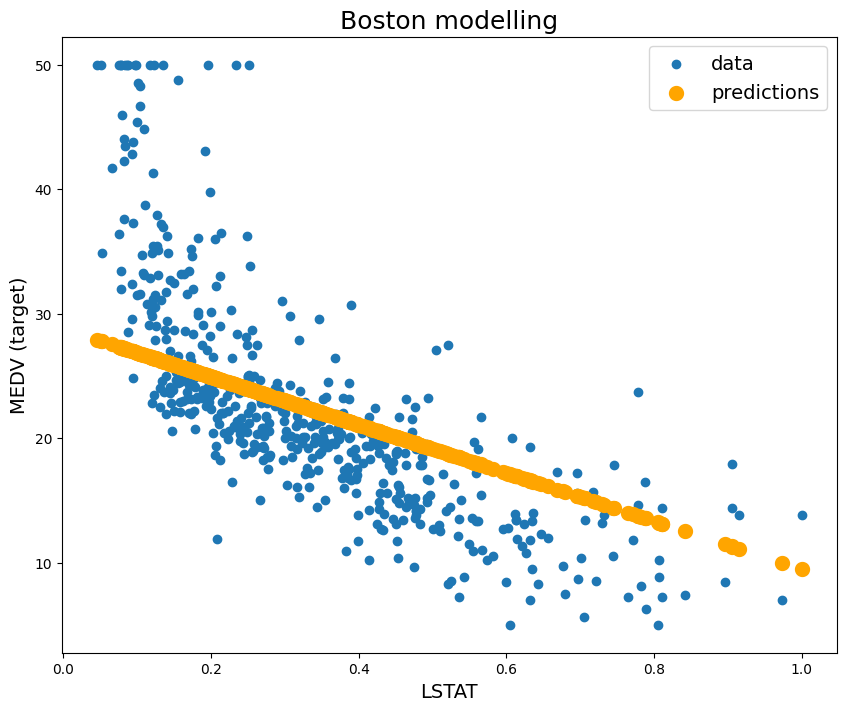

loss =  48.431183


In [86]:
for i in range(300):
    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y) ** 2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -= 0.05 * w.grad
    b.data -= 0.05 * b.grad

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i + 1) % 5 == 0:
        clear_output(True)
        plt.figure(figsize=(10, 8))
        plt.scatter(x.data.numpy(), y.data.numpy(), label="data")
        plt.scatter(
            x.data.numpy(),
            y_pred.data.numpy(),
            color="orange",
            linewidth=5,
            label="predictions",
        )
        plt.xlabel("LSTAT", fontsize=14)
        plt.ylabel("MEDV (target)", fontsize=14)
        plt.title("Boston modelling", fontsize=18)
        plt.legend(fontsize=14)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.1:
            print("Done!")
            break

### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросети в **PyTorch**, нужно освоить три вещи:

1. Как формировать батчи и подавать их на вход сети
2. Как задать архитектуру сети
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и подавать их на вход нейросети

Чтобы иметь возможность итерироваться по данным и применять к ним преобразования (например, аугментации, о которых вы узнаете позже), нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

У такого класса **должно быть** три метода:

* `__init__` — создаёт поля класса (например, путь к папке с файлами с тренировочными объектами)
* `__len__` — возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` — по индексу возвращает семпл и таргет к нему


Давайте напишем такой сами, в качестве данных используя рандомные значения.

In [89]:
class RandomDataset(torch.utils.data.Dataset):
    """
    Our random dataset
    """

    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return {
            "sample": torch.tensor(self.x[idx, :], dtype=torch.float),
            "target": self.y[idx],
        }

In [90]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [91]:
our_dataset = RandomDataset(x, y)

In [96]:
our_dataset.__getitem__(1)

{'sample': tensor([0.9752, 0.1716, 0.5270, 0.7421, 0.2155]),
 'target': np.float64(0.863265199876584)}

In [94]:
x[1], y[1]

(array([0.97523867, 0.1716327 , 0.52697357, 0.74210665, 0.21545874]),
 np.float64(0.863265199876584))

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [97]:
dataloader = torch.utils.data.DataLoader(
    our_dataset, batch_size=4, shuffle=True, num_workers=2
)

Работают с ним следующим образом:

In [99]:
batch = next(iter(dataloader))

print(f"Sample:\n{batch['sample']}")
print(f"Target:\n{batch['target']}")
batch["sample"].size()

Sample:
tensor([[0.2348, 0.1563, 0.2514, 0.7277, 0.0247],
        [0.9075, 0.8120, 0.4402, 0.2083, 0.7775],
        [0.9280, 0.7459, 0.2828, 0.1211, 0.0985],
        [0.2220, 0.7096, 0.9009, 0.2881, 0.7169]])
Target:
tensor([0.4358, 0.7386, 0.6432, 0.8805], dtype=torch.float64)


torch.Size([4, 5])

**Как сделать нейросеть**

Для того, чтобы в high-level **PyTorch** создавать нейросети, используется модуль `torch.nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса **должен быть** метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [100]:
model = nn.Sequential()  # создаем пустую модель, в которую будем добавлять слои
model.add_module(
    "l1", nn.Linear(5, 32)
)  # добавили слой с 5-ю нейронами на вход и 32 на выход
model.add_module("l2", nn.ReLU())  # добавили функцию активации
model.add_module(
    "l3", nn.Linear(32, 1)
)  # добавили слой с 32 нейронами на вход и 1-ю на выход

# альтернативный способ
another_model = nn.Sequential(nn.Linear(5, 30), nn.ReLU(), nn.Linear(30, 1))

In [102]:
model

Sequential(
  (l1): Linear(in_features=5, out_features=32, bias=True)
  (l2): ReLU()
  (l3): Linear(in_features=32, out_features=1, bias=True)
)

In [103]:
y_pred = model(batch["sample"])  # получили предсказания модели

In [104]:
y_pred

tensor([[ 0.0484],
        [ 0.0813],
        [ 0.1385],
        [-0.0226]], grad_fn=<AddmmBackward0>)

**Как написать цикл обучения и отслеживать метрики**

Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [105]:
# используем готовый класс от торча для загрузки данных для тренировки
mnist_train = torchvision.datasets.MNIST(
    "./mnist/", train=True, download=True, transform=torchvision.transforms.ToTensor()
)
mnist_val = torchvision.datasets.MNIST(
    "./mnist/", train=False, download=True, transform=torchvision.transforms.ToTensor()
)

# так как это уже унаследованный от Dataset класс, его можно сразу обернуть в даталоадер
train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=2
)

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=False, num_workers=2
)

100%|██████████| 9.91M/9.91M [00:02<00:00, 4.95MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 129kB/s]
100%|██████████| 1.65M/1.65M [00:06<00:00, 245kB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.52MB/s]


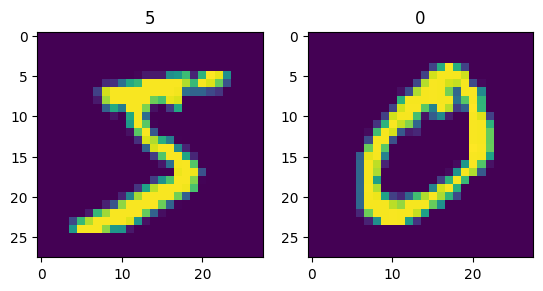

In [106]:
# посмотрим на то, с чем мы работаем
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [107]:
model = nn.Sequential(
    nn.Flatten(),  # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(
        28 * 28, 128
    ),  # линейный слой, преобразующий вектор размера 784 в вектор размера 128
    nn.ReLU(),  # нелинейность
    nn.Linear(
        128, 10
    ),  # линейный слой, преобразующий вектор размера 128 в вектор размера 10
)

# создаем оптимизатор, который будет обновлять веса модели
optimizer = torch.optim.AdamW(model.parameters(), fused=True)

Веса моделей хранятся в виде матриц и выглядят так:

In [108]:
[x for x in model.named_parameters()]

[('1.weight',
  Parameter containing:
  tensor([[-0.0352,  0.0240,  0.0190,  ...,  0.0018, -0.0156, -0.0006],
          [-0.0234, -0.0218,  0.0074,  ..., -0.0304,  0.0230, -0.0289],
          [ 0.0283,  0.0007, -0.0284,  ..., -0.0012, -0.0228, -0.0143],
          ...,
          [-0.0162, -0.0293,  0.0102,  ..., -0.0342,  0.0072, -0.0254],
          [-0.0345,  0.0169,  0.0225,  ...,  0.0077,  0.0036,  0.0249],
          [ 0.0276, -0.0348, -0.0080,  ..., -0.0212,  0.0132, -0.0312]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([ 0.0226,  0.0192, -0.0140, -0.0234,  0.0275, -0.0281, -0.0003, -0.0343,
          -0.0295,  0.0047,  0.0277,  0.0097,  0.0194,  0.0173, -0.0072,  0.0221,
           0.0164,  0.0348, -0.0085, -0.0234, -0.0043, -0.0295, -0.0320, -0.0204,
           0.0146, -0.0002, -0.0243,  0.0180, -0.0121,  0.0284,  0.0346,  0.0185,
           0.0002, -0.0103,  0.0158,  0.0238, -0.0164,  0.0265,  0.0134, -0.0270,
          -0.0095,  0.0044, -0.0137, 

Вместо того, чтобы каждый раз самим рисовать графики в `matplotlib`, мы будем _красиво_ трекать метрики в полуавтоматическом режиме в [wandb](https://wandb.ai). Для этого регистрируемся на сайте, устанавливаем и логинимся (это того стоит).

Note. Помимо этого инструмента есть другие альтернативы: Tensorboard (очень минималистичный, работает локально), MLFlow (менее красивый, но опенсорсный), Neptune (примерно как W&B).

In [110]:
!pip install wandb --upgrade --quiet

In [112]:
# логинимся в своего пользователя (предварительно нужно ввести ключ из настроек с wandb.ai через консоль)
!wandb login
# wandb.login()

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: burunduk387 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [113]:
# инициализируем проект
wandb.init(project="pytorch-demo")
# сохраняем параметры сетки в wandb + просим следить за градиентами сетки
wandb.watch(model)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: burunduk387 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Можно перейти по ссылке и следить за нашей моделью прямо во время обучения!

Одним из основных преимуществ PyTorch является возможность использования GPU-ускорителей на CUDA-совместимых графических процессорах Nvidia Compute Unified Device Architecture (CUDA) и Apple Metal Performance Shaders (MPS). До сих пор все, что мы делали, было на процессоре.

Во-первых, мы должны проверить, доступен ли графический процессор, с помощью метода ```is_available()```. Если у вас не установлен CUDA-совместимый графический процессор и драйверы CUDA, то после исполнения ячейки ниже в качестве девайса будет выступать CPU.

In [115]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
else:
    device = torch.device("cpu")

In [116]:
!nvidia-smi

Sat Mar 22 17:49:58 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Как только мы определили, что один или несколько графических процессоров доступны, нам нужно поместить наши данные туда, где графический процессор сможет их увидеть. Ваш процессор выполняет вычисления над данными в оперативной памяти вашего компьютера. К вашему графическому процессору подключена выделенная память. Всякий раз, когда вы хотите выполнить вычисление на устройстве, вы должны переместить все данные, необходимые для этого вычисления, в память, доступную этому устройству.

По умолчанию новые тензоры создаются на CPU, поэтому нам нужно указать, когда мы хотим создать наш тензор на графическом процессоре, с помощью необязательного аргумента устройства.

In [117]:
x = torch.rand(2, 2, device=device)
x

tensor([[0.6243, 0.0106],
        [0.4118, 0.9227]], device='cuda:0')

Чтобы выполнять вычисления с использованием двух или более тензоров, все тензоры должны находиться на одном устройстве.

Если у вас уже есть тензор, расположенный на одном устройстве, вы можете переместить его на другое с помощью метода ```to()```.
Перенесем созданную ранее модель на наш новый девайс.

In [118]:
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
# всего у нас будет 5 эпох (5 раз подряд пройдемся по всем батчам из трейна)
for epoch in range(5):
    for x_train, y_train in tqdm(train_dataloader):  # берем батч из трейн лоадера
        model.train()
        y_pred = model(x_train.to(device))  # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train.to(device))  # считаем лосс
        loss.backward()  # считаем градиенты обратным проходом
        optimizer.step()  # обновляем параметры сети
        optimizer.zero_grad(
            set_to_none=True
        )  # обнуляем посчитанные градиенты параметров

    if epoch % 2 == 0:
        model.eval()
        val_loss = []  # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad():  # на валидации запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(
                val_dataloader
            ):  # берем батч из валидационного лоадера
                y_pred = model(x_val.to(device))  # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val.to(device))  # считаем лосс
                val_loss.append(loss.cpu().numpy())  # добавляем в массив
                val_accuracy.extend(
                    (torch.argmax(y_pred, dim=-1) == y_val.to(device))
                    .cpu()
                    .numpy()
                    .tolist()
                )

        # скидываем метрики на wandb и автоматом смотрим на графики
        wandb.log(
            {
                "mean val loss": np.mean(val_loss),
                "mean val accuracy": np.mean(val_accuracy),
            }
        )

        # печатаем метрики
        print(
            f"Epoch: {epoch}, loss: {np.mean(val_loss)}, accuracy: {np.mean(val_accuracy)}"
        )

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 0, loss: 0.10873696208000183, accuracy: 0.9662


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/2500 [00:00<?, ?it/s]

Epoch: 2, loss: 0.08288835734128952, accuracy: 0.975


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

### Дополнительные материалы

* [Хорошая книга про pytorch](https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)